In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_classification # Generate and plot a synthetic imbalanced classification dataset

In [ ]:
# Problem 1:

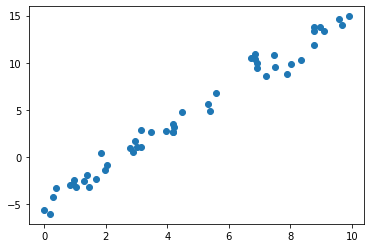

In [8]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50) 
y = 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);

In [10]:
# Reshape to avoid 2D expectation error- reshape if a single dimension
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
#Linear regression model
#importing estimator:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X,y)

LinearRegression()

In [12]:
y_pred = reg_model.predict(X)
y_pred

array([ 3.45532973,  9.60390451, -4.99625847,  1.13033546, -2.02352874,
       -3.12668096, -1.22269367,  2.00666042,  3.04472811,  5.92436322,
        3.49937104,  8.892253  , -0.85390307, 12.80269695, -4.44337338,
        8.59319935,  3.46106263,  6.32723234, -2.1526407 , -0.98264625,
       11.23418736, 14.63010688,  1.35518547,  9.03624798, 12.76766102,
       13.13696802, -3.27455334, -4.20685508, -1.55575986, 12.80320511,
       -3.00488141,  3.53815379, 14.41984386,  5.80979655,  9.02721673,
        1.39758358,  8.9182302 , 11.92102807, -4.62783552, 10.20841456,
       15.04770203, 10.16830298,  0.68660823, 11.001763  , -2.90597039,
        4.08115994, 13.420551  ,  0.9535948 ,  0.83522993, -2.36262642])

In [15]:
# The method to print MSE and R2 score

def error_and_score(model,y, y_pred): 
    from sklearn.metrics import mean_squared_error, r2_score
    print('Coefficients: ', model.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('R^2 Score: %.2f'
          % r2_score(y, y_pred))
    
# Method to plot models
def plotter(X,y,y_pred, title):
    plt.scatter(X, y,  color='blue')
    plt.plot(X, y_pred, color='orange', linewidth=2)
    plt.title(title)
    plt.show()

In [16]:
#printing parameters:
print(reg_model.intercept_)
print(reg_model.coef_,"\n")
error_and_score(reg_model,y, y_pred)

-4.998577085553202
[2.02720881] 

Coefficients:  [2.02720881]
Mean squared error: 0.82
R^2 Score: 0.98


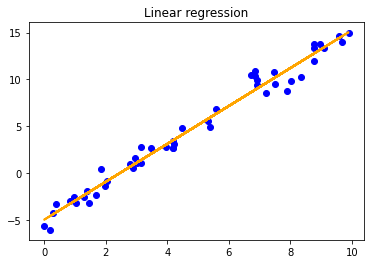

In [91]:
# Plot outputs
plotter(X,y,y_pred, "Linear regression")

In [59]:
#Linear SVMs
#Import svm model
from sklearn import svm
svr_linear = svm.SVR(kernel='linear')
X = x.reshape(-1, 1)
svr_linear.fit(X, y)

SVR(kernel='linear')

Coefficients:  [[2.02515455]]
Mean squared error: 0.82
R^2 Score: 0.98


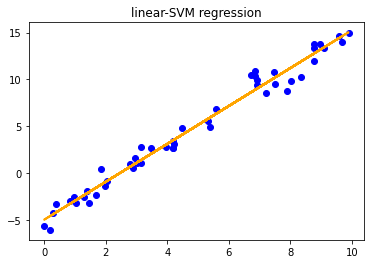

In [90]:
y_svr = svr_linear.predict(X)
error_and_score(svr_linear,y, y_svr)
plotter(X,y,y_svr,"linear-SVM regression")

Mean squared error: 1.85
R^2 Score: 0.95


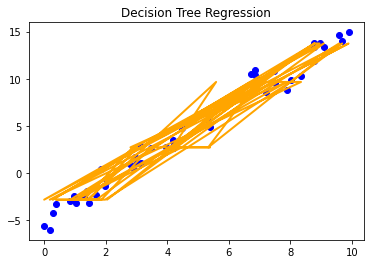

In [96]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

y_tree = tree_reg.predict(X)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_tree))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'% r2_score(y, y_tree))
plotter(X,y,y_tree, "Decision Tree Regression")

In [18]:
# Problem 2 : Starts here

from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=1.0)

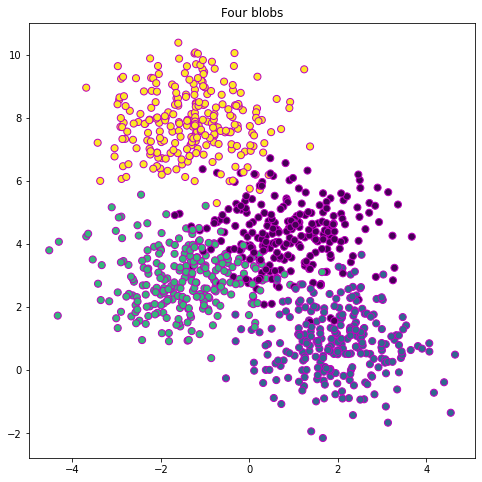

In [19]:
plt.figure(figsize=(8, 8))
plt.title("Four blobs", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="m")

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=109)

[[-1.45156905  1.42199886]
 [ 0.24672869 -0.0393687 ]
 [-1.69854001  1.67810788]
 ...
 [-0.66796494  1.65176378]
 [-0.72152641  1.38155557]
 [ 2.20969411 -1.2024402 ]]


Softmax regression is a method in machine learning which allows for the classification of an input into discrete classes

In [23]:
# the loss function for softmax regression.
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [24]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

ValueError: Found input variables with inconsistent numbers of samples: [250, 50]

In [16]:
# Non-linear SVM
from sklearn import svm
# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

array([3, 2, 1, 3, 0, 1, 1, 3, 0, 2, 3, 1, 3, 2, 1, 3, 1, 1, 0, 3, 0, 2,
       2, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 3, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 3, 0, 2,
       3, 2, 1, 0, 3, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0,
       2, 0, 1, 3, 1, 3, 2, 1, 3, 3, 1, 1, 2, 3, 0, 2, 2, 1, 3, 0, 0, 1,
       3, 2, 0, 3, 1, 0, 1, 1, 1, 3, 2, 2, 2, 1, 3, 0, 2, 2, 1, 2, 3, 3,
       0, 0, 2, 1, 0, 3, 3, 3, 0, 2, 1, 3, 0, 0, 1, 2, 2, 3, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 3, 1, 3, 3, 2,
       3, 2, 0, 2, 3, 1, 2, 0, 0, 1, 2, 2, 3, 3, 2, 0, 0, 3, 2, 3, 2, 2,
       3, 3, 3, 0, 2, 0, 0, 1, 3, 2, 3, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 3,
       0, 1, 3, 0, 0, 1, 0, 2, 2, 2, 3, 1, 0, 0, 2, 3, 2, 1, 3, 0, 2, 2,
       2, 1, 3, 2, 0, 1, 2, 3])

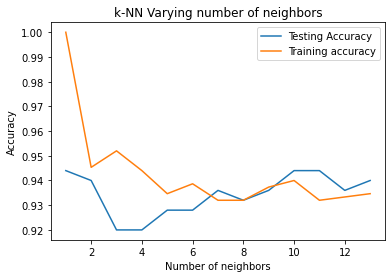

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

The highest accuracy is achieved when value of k is 10

In [26]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)
y_nb= classifier.predict(X_test) 
y_nb

array([3, 2, 1, 3, 0, 1, 1, 3, 0, 2, 3, 1, 3, 2, 1, 3, 1, 1, 0, 3, 0, 2,
       2, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 3, 0, 2,
       3, 2, 1, 3, 3, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0,
       2, 0, 1, 3, 1, 3, 2, 1, 3, 3, 1, 1, 2, 3, 0, 2, 2, 1, 3, 0, 0, 1,
       3, 2, 0, 3, 1, 0, 1, 1, 1, 3, 2, 2, 2, 1, 3, 0, 2, 2, 1, 2, 3, 3,
       0, 0, 2, 1, 0, 3, 3, 3, 0, 2, 1, 3, 0, 0, 1, 2, 2, 3, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 3, 1, 3, 3, 2,
       3, 2, 0, 2, 3, 1, 2, 0, 2, 1, 2, 2, 3, 3, 2, 0, 0, 3, 2, 3, 2, 2,
       3, 3, 3, 0, 2, 0, 0, 1, 3, 2, 3, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 3,
       0, 0, 3, 0, 0, 1, 0, 2, 2, 2, 3, 1, 0, 0, 2, 3, 2, 1, 3, 0, 2, 2,
       2, 1, 3, 2, 0, 1, 2, 3])

In [48]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# clf.fit(X_train, y_train)

# y_mnb = clf.predict(X_test)

print(X_test)

[[-2.08344846e+00  6.88871960e+00]
 [-7.17723716e-01  1.71978938e+00]
 [ 2.06389542e+00  1.42466787e+00]
 [-1.23450729e+00  5.99075885e+00]
 [ 6.75068326e-02  3.87946971e+00]
 [ 4.55246791e+00 -1.34765799e+00]
 [ 7.75578348e-01  3.12232456e-01]
 [ 1.83311983e-01  9.29767419e+00]
 [ 2.88432468e-01  3.08970992e+00]
 [-3.68497258e+00  4.23643328e+00]
 [ 6.18427374e-01  8.59292835e+00]
 [ 1.70730567e+00 -4.55725198e-01]
 [-1.40962931e+00  9.62990882e+00]
 [-1.27929415e+00  3.28128048e+00]
 [ 9.15465066e-01  1.68262118e+00]
 [-2.08411184e+00  6.89336643e+00]
 [ 2.28087618e+00  1.34737576e+00]
 [ 1.61640160e+00  2.68683128e+00]
 [ 9.59249665e-01  4.68293906e+00]
 [-1.27811190e+00  7.71728923e+00]
 [ 1.43368568e+00  3.33917531e+00]
 [-3.14319384e-01  1.76171596e+00]
 [-1.60002366e+00  1.62050261e+00]
 [ 7.08536542e-01  3.17577600e+00]
 [ 6.33347650e-01  2.89561974e+00]
 [ 2.99773564e+00  6.30068914e-01]
 [-1.70036791e+00  2.40785272e+00]
 [-2.30572942e+00  7.27947498e+00]
 [-2.06353144e+00  9

In [49]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)

ValueError: Negative values in data passed to CategoricalNB (input X)

In [62]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_nb)
print("Gaussian accuracy score :")

ValueError: Found input variables with inconsistent numbers of samples: [540, 250]

In [27]:
# Problem 3

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.datasets import load_digits 
digits = load_digits()

In [28]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)

In [31]:
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=None, splitter="best", max_leaf_nodes=9)

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_tree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  0  0  0  2  0  0  0  2  1]
 [ 0  0  0  1  5 15  1  0 25  2]
 [ 2  0  0  2  0 12  1  0 32  0]
 [ 0  0  0 42  1  6  0  1  6  8]
 [ 3  0  0  0 41  3 11  2  1  0]
 [ 3  0  0  0  0 39  0  0  0  5]
 [ 1  0  0  0  0  1 49  0  0  0]
 [ 0  0  0  0  1  1  0 42 12  1]
 [ 0  0  0  1  0  1  0  1 37  6]
 [ 0  0  0  4  0  1  0  4  3 45]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        59
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        49
           3       0.84      0.66      0.74        64
           4       0.82      0.67      0.74        61
           5       0.49      0.83      0.62        47
           6       0.79      0.96      0.87        51
           7       0.84      0.74      0.79        57
           8       0.31      0.80      0.45        46
           9       0.66      0.79      0.72        57

    accuracy                           0.65       540
   macro avg       

C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


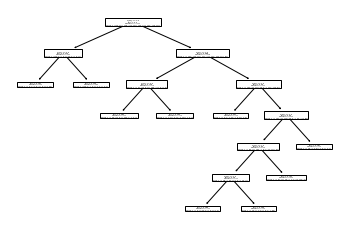

In [88]:
#Plotting Tree
from sklearn import tree
tree.plot_tree(clf_tree)
plt.show()

In [37]:
# Problem 4:

# Method to plot 

def plot_space(X, y, title):
    counter = Counter(y)
    print(counter)
    
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Counter({0: 950, 1: 50})


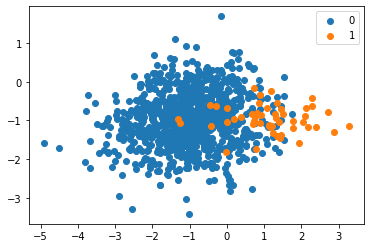

In [38]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=20)

from sklearn.datasets import make_gaussian_quantiles
# X1, y1 = make_gaussian_quantiles(cov=3.,
#                                  n_samples=10000, n_features=2,
#                                  n_classes=2, random_state=1)

counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [40]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.4, random_state=20)

In [41]:
# define model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# y_pred

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[381   2]
 [ 10   7]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       383
           1       0.78      0.41      0.54        17

    accuracy                           0.97       400
   macro avg       0.88      0.70      0.76       400
weighted avg       0.97      0.97      0.97       400



In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
predicted= model.predict(X_test)
# print(predicted)

In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[381   2]
 [ 10   7]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       383
           1       0.78      0.41      0.54        17

    accuracy                           0.97       400
   macro avg       0.88      0.70      0.76       400
weighted avg       0.97      0.97      0.97       400



 removing samples from the majority class (under-sampling) 
 and / or adding more examples from the minority class (over-sampling).

900 Removed indexes
Counter({0: 50, 1: 50})


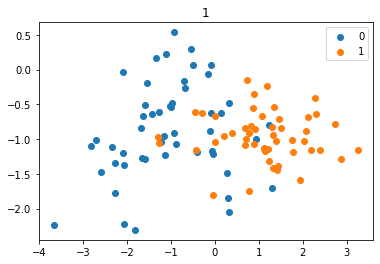

In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print(X.shape[0] - X_rus.shape[0], 'Removed indexes')

plot_space(X_rus, y_rus, 'Random under-sampling')

Counter({0: 950, 1: 950})


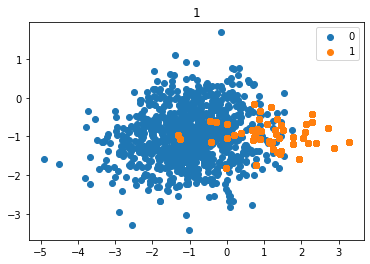

0 new random picked points


In [46]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="all")
X_ros, y_ros = ros.fit_resample(X, y)

plot_space(X_ros, y_ros, 'Random over-sampling')

print(X_ros.shape[1] - X.shape[1], 'new random picked points')


Counter({0: 933, 1: 50})


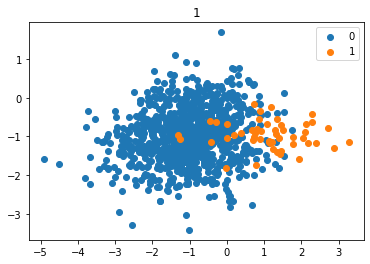

In [47]:
from imblearn.under_sampling import TomekLinks

# transform the dataset
undersample = TomekLinks()

X_under, y_under = undersample.fit_resample(X, y)

plot_space(X_under, y_under, 'Tomek links under-sampling')

Counter({0: 950, 1: 475})


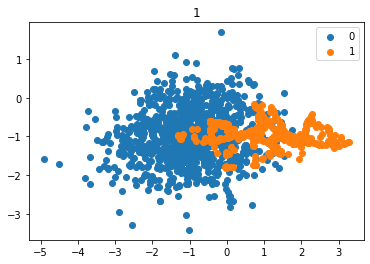

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_sm, y_sm = smote.fit_resample(X, y)

plot_space(X_sm, y_sm, 'SMOTE over-sampling')

In [50]:
#undersampled 

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X_under, y_under, test_size = 0.4, random_state=20)

# Train the model using the training sets
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print(classification_report(y_test, y_pred))

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test)
# print(predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       374
           1       0.79      0.55      0.65        20

    accuracy                           0.97       394
   macro avg       0.88      0.77      0.82       394
weighted avg       0.97      0.97      0.97       394

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       374
           1       0.92      0.55      0.69        20

    accuracy                           0.97       394
   macro avg       0.95      0.77      0.84       394
weighted avg       0.97      0.97      0.97       394



In [53]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X_sm, y_sm, test_size = 0.4, random_state=20)

# Train the model using the training sets
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print("Classification Report :LogisticRegression\n", classification_report(y_test, y_pred))

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test)
# print(predicted)
print("Classification Report : KNeighborsClassifier\n ",classification_report(y_test, predicted))

Classification Report :LogisticRegression
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       372
           1       0.87      0.76      0.81       198

    accuracy                           0.88       570
   macro avg       0.87      0.85      0.86       570
weighted avg       0.88      0.88      0.88       570

Classification Report : KNeighborsClassifier
                precision    recall  f1-score   support

           0       0.92      0.91      0.91       372
           1       0.84      0.85      0.84       198

    accuracy                           0.89       570
   macro avg       0.88      0.88      0.88       570
weighted avg       0.89      0.89      0.89       570



The precision has gone up for both alogorithms after oversampling